<a href="https://colab.research.google.com/github/manishsinha44/Machine-Learning/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

##Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the Self Organizing Map

In [4]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8595 sha256=a27f40a012f05da807478cfbe3ffab60071a9da0ea90aeb058f0a0dda72b4884
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [5]:
from minisom import MiniSom

In [6]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the Results

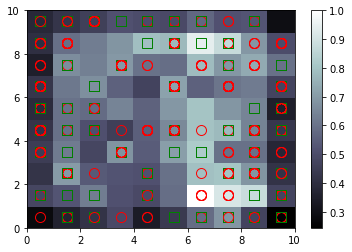

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 1)
show()

##Finding Fraud cases

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Print the Fraud

In [9]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15777994
15597536
15697310
15571284
15570947
15641715
15592326
15697844
15706602
15728082
15675176
15768449
15665374
15740356
15642098


# Supervised Learning

##Create Matrix of Futures

In [10]:
customers = dataset.iloc[:, 1:].values

##Create Dependent Variable

In [11]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Creating ANN

In [12]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

Import Tensorflow

In [13]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [14]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##Compling the ANN

In [15]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN

In [16]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 1ms/step - loss: 0.5375 - accuracy: 0.8362
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2700 - accuracy: 0.9754
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1862 - accuracy: 0.9768
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1470 - accuracy: 0.9768
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1208 - accuracy: 0.9768
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0978 - accuracy: 0.9768
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0824 - accuracy: 0.9783
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0701 - accuracy: 0.9783
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0610 - accuracy: 0.9783
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0531 - accuracy: 0.9783

In [17]:
# Predicting the Test Set Results

In [18]:
y_pred = ann.predict(customers)
#adding customer IDs
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
#Sorting by probability 
y_pred = y_pred[y_pred[:, 1].argsort()]

In [19]:
print(y_pred)

[[1.56458200e+07 1.20175207e-06]
 [1.56546250e+07 8.69582982e-06]
 [1.58028690e+07 1.20508430e-05]
 ...
 [1.56973100e+07 4.09108847e-01]
 [1.56420980e+07 4.63453114e-01]
 [1.55709470e+07 4.87366557e-01]]
